# Preamble
Title: Spotify Song Tracks Classifier - Project02

Author: Lucas Nieddu

Contact Info: lnieddu@msudenver.edu

Date: November 04, 2021
# Introduction 
The goal of this analysis is to develop classification models capable of predicting the genre of a song based on measured audio attributes. 

# Dataset 

The dataset for this project is available under 'data' (genres_v2.csv) and it was obtained from [Kaggle](https://www.kaggle.com/mrmorj/dataset-of-songs-in-spotify). It consists of a collection of 42,305 song track from various musical genres, with the following audio attributes:

* danceability
* energy 
* key 
* loudness 
* speechiness 
* acousticness 
* instrumentalness 
* liveness 
* valence 
* tempo 
* duration_ms

The meaning of those audio attributes are described by Spotify [here](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features).
Note: Further description of each column follows

# Sources
- https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
- https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
- https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
- https://annahava.medium.com/too-many-categories-how-to-deal-with-categorical-features-of-high-cardinality-d4563cfe62d6
- https://towardsdatascience.com/comprehensive-guide-to-multiclass-classification-with-sklearn-127cc500f362
- https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6
- https://machinelearningmastery.com/feature-selection-machine-learning-python/

# Data Preprocessing Section

In [ ]:
# Imports
import os
import pandas as pd
import numpy as np
from matplotlib.cbook import boxplot_stats 
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn imports
# preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# model analysis 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

# statistics
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

: 

In [2]:
# Load the file into a pandas dataframe 
def load_csv():
    try:
        file_name = os.path.join("data", "genres_v2.csv" )
        genres_df = pd.read_csv(file_name, low_memory = False)
        print(file_name, "successfully loaded into pandas dataframe 'genres_df'")
        return genres_df
    except Exception as e:
        print("FILE HANDLING ERROR: ", e)
data_frame = load_csv()

data/genres_v2.csv successfully loaded into pandas dataframe 'genres_df'


### Quick look at the data...

In [3]:
data_frame.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
data_frame.describe(include = "all")

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,...,42305,42305,42305,42305,42305.000000,42305.000000,42305,21519,20780.000000,20780
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35877,35877,35877,35877,NaN,NaN,15,15439,NaN,132
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7D5qMGajdfznFcXFArk5VE,spotify:track:7D5qMGajdfznFcXFArk5VE,https://api.spotify.com/v1/tracks/7D5qMGajdfzn...,https://api.spotify.com/v1/audio-analysis/7D5q...,NaN,NaN,Underground Rap,Forever,NaN,Euphoric Hardstyle
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9,9,9,9,NaN,NaN,5875,14,NaN,1398
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,...,NaN,NaN,NaN,NaN,250865.846685,3.972580,NaN,NaN,10483.970645,NaN
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,...,NaN,NaN,NaN,NaN,102957.713571,0.268342,NaN,NaN,6052.359519,NaN
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,...,NaN,NaN,NaN,NaN,25600.000000,1.000000,NaN,NaN,0.000000,NaN
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,...,NaN,NaN,NaN,NaN,179840.000000,4.000000,NaN,NaN,5255.750000,NaN
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,...,NaN,NaN,NaN,NaN,224760.000000,4.000000,NaN,NaN,10479.500000,NaN
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,...,NaN,NaN,NaN,NaN,301133.000000,4.000000,NaN,NaN,15709.250000,NaN


#### Initial Observations...
- There are some null values in the dataset
- There are three different dtypes(int, float, object) 
- I need to take a closer look dtypes = object ---> These are likely string representations  
- I need to take a closer look at the columns with null values
- There are some columns in the dataset that are not mentioned in the project specifications
- I have decided to drop columns not mentioned in the specs. 

In [6]:
# drop columns not mentioned in specs, part from 'mode'
features_list = ["danceability","energy", "key", 
           "loudness" , "speechiness", "acousticness", 
           "instrumentalness", "liveness", "valence", 
           "tempo", "duration_ms", "mode", "genre"]

def drop_features_from_list(features_list):
    # make a copy of the dataframe
    print("Making a copy of 'data_frame' called 'df'...")
    df = pd.DataFrame(data_frame).copy()
    
    # drop feature columns from a list 
    print("Dropping features...")
    print("Keeping:  \n\n",features_list, "\n \n")
    for i in df.columns.values:
        if i not in features_list:
            df = df.drop(str(i), axis = 1)
    print("Done.")
    return df
df = drop_features_from_list(features_list)

Making a copy of 'data_frame' called 'df'...
Dropping features...
Keeping:  

 ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'mode', 'genre'] 
 

Done.


### Take a second look at the dataframe after dropping uneeded features...

In [7]:
df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  duration_ms       42305 non-null  int64  
 12  genre             42305 non-null  object 
dtypes: float64(9), int64(3), object(1)
memory usage: 4.2+ MB


### Quick look at the target variable 'genre'...

In [9]:
df['genre']

0        Dark Trap
1        Dark Trap
2        Dark Trap
3        Dark Trap
4        Dark Trap
           ...    
42300    hardstyle
42301    hardstyle
42302    hardstyle
42303    hardstyle
42304    hardstyle
Name: genre, Length: 42305, dtype: object

- The target variable will need to be encoded for the data to be machine ready.
- I need to look at all the columns one by one for further analysis.
- Following, is a detailed explanation and analysis of the columns.
- First, I will make a copy of the original dataframe and seperate the target variable from the rest of the dataset

# Analysis Section

### Contains:

  - Target analysis 
  - Feature Analysis 
  - Summary Statistics for each feature
  - Correlation analysis of each feature
  - Feature Engineerining (normalization, encode categorical data)
  - Data visualization

In [10]:
# Function to make a copy of the dataframe and return a feature matrix X and target array 
def get_X_and_y(df):
    print("Seperating target variable 'genre' from dataset X...")
    y = pd.DataFrame(df['genre'])
    X = pd.DataFrame(df.drop(['genre'], axis = 1))
    return X, y

X, y = get_X_and_y(df)

Seperating target variable 'genre' from dataset X...


## Target Variable - Genre - string
Shows the genre of the music
- The target variable 'genre' is categorical and also a string.
- I have chose to transform the target variable column using LabelEncoder() class.

### Process Target Data...

In [11]:
def process_target_data():
    
    # Descriptive Statistics 
    desc = pd.DataFrame(y['genre'].describe())
    
    # encoding the target varaiable
    print("Transforming categorical in target data ...\n  ")
    label_encoder = LabelEncoder()
    enc = LabelEncoder().fit_transform(y['genre'])
    y_enc = pd.DataFrame({"Genre": enc})
    y_dummy = pd.get_dummies(y["genre"])
    print("Done.")
    return y_enc, y_dummy
y_enc, y_dummy = process_target_data()

Transforming categorical in target data ...
  
Done.


#### Quick look at the encoded y data using LabelEncoder()...

In [12]:
print(y_enc.value_counts())

Genre
7        5875
0        4578
2        3028
13       2999
14       2987
11       2975
8        2966
10       2961
12       2956
9        2936
5        2099
6        1956
4        1848
1        1680
3         461
dtype: int64


In [13]:
y_enc.head()

,Genre
0,0
1,0
2,0
3,0
4,0


#### Quick look at the y encoded data using dummy variables

In [14]:
y_dummy.head()

,Dark Trap,Emo,Hiphop,Pop,Rap,RnB,Trap Metal,Underground Rap,dnb,hardstyle,psytrance,techhouse,techno,trance,trap
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Helper Function for data analysis ahead 

In [15]:
def analyze_feature(X, feature):
    
    # used to compute the correlation between the target variable and the feature coming in
    corr_df = y_dummy.copy()
    corr_df[feature] = X[feature]
    
    # Summary Statisics
    desc = X[feature].describe()
    
    # Used to show the head of the data (not needed but I found it helpful)
    data = X[feature].head()
    
    # Boxplot to detect outliers
    box_plot = sns.boxplot(y='genre', x=feature, 
                 data=df, 
                 palette="colorblind").set_title("Outliers")

    
    # outliers 
    outliers = boxplot_stats(pd.DataFrame(X[feature])).pop(0)['fliers']
    
    # Correlation matrix between target and feature
    corr = corr_df.corr()
    show_corr = corr[[feature]]
    
    return desc, data, box_plot, show_corr, outliers

# Feature Analysis

## danceability - float
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

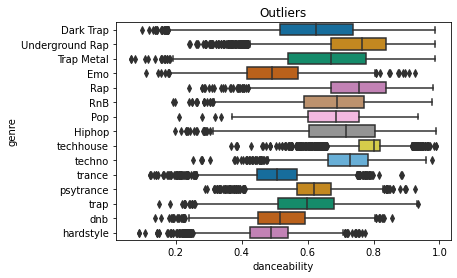

In [16]:
desc, data, boxplot, corr, outliers = analyze_feature(df, "danceability")

In [17]:
print("There are ", len(outliers), " outliers in this feature.")

There are  45  outliers in this feature.


In [18]:
print(data)

0    0.831
1    0.719
2    0.850
3    0.476
4    0.798
Name: danceability, dtype: float64


In [19]:
print(desc)

count    42305.000000
mean         0.639364
std          0.156617
min          0.065100
25%          0.524000
50%          0.646000
75%          0.766000
max          0.988000
Name: danceability, dtype: float64


#### Correlation to target

In [20]:
corr

,danceability
Dark Trap,-0.045664
Emo,-0.189139
Hiphop,0.105694
Pop,0.025094
Rap,0.141258
RnB,0.050831
Trap Metal,0.011528
Underground Rap,0.269987
dnb,-0.207619
hardstyle,-0.281321


<AxesSubplot:>

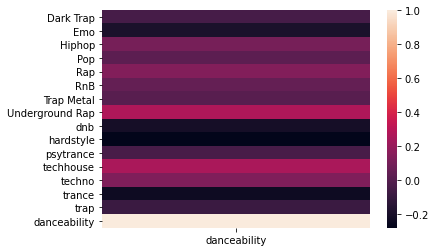

In [21]:
sns.heatmap(corr)

## energy - float
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

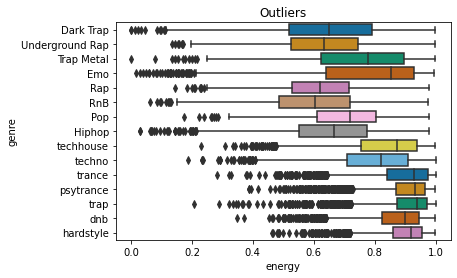

In [22]:
desc, data, boxplot, corr, outliers = analyze_feature(df, "energy")

In [23]:
print("There are ", len(outliers), " outliers in this feature.")

There are  139  outliers in this feature.


In [24]:
print(data)

0    0.814
1    0.493
2    0.893
3    0.781
4    0.624
Name: energy, dtype: float64


In [25]:
print(desc)

count    42305.000000
mean         0.762516
std          0.183823
min          0.000243
25%          0.632000
50%          0.803000
75%          0.923000
max          1.000000
Name: energy, dtype: float64


#### Correlation to target

In [26]:
corr

,energy
Dark Trap,-0.219187
Emo,-0.001483
Hiphop,-0.163279
Pop,-0.037045
Rap,-0.165603
RnB,-0.203391
Trap Metal,-0.016000
Underground Rap,-0.276880
dnb,0.165683
hardstyle,0.198660


<AxesSubplot:>

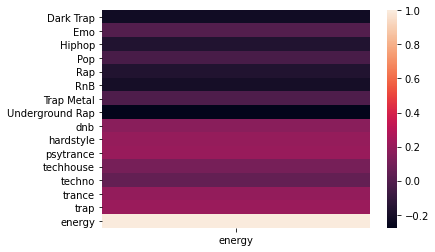

In [27]:
sns.heatmap(corr)

## key: integer
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

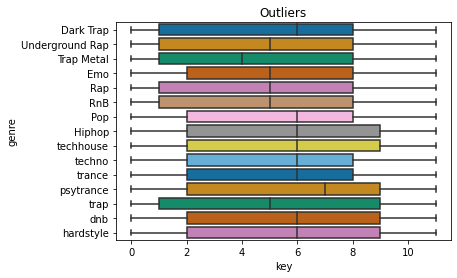

In [28]:
desc, data, boxplot, corr, outliers= analyze_feature(df, "key")

In [29]:
print("There are ", len(outliers), " outliers in this feature.")

There are  0  outliers in this feature.


In [30]:
print(data)

0    2
1    8
2    5
3    0
4    2
Name: key, dtype: int64


In [31]:
print(desc)

count    42305.000000
mean         5.370240
std          3.666145
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max         11.000000
Name: key, dtype: float64


#### Correlation to target

In [32]:
corr

,key
Dark Trap,-0.006828
Emo,-0.017598
Hiphop,0.013854
Pop,0.000827
Rap,-0.018745
RnB,-0.021709
Trap Metal,-0.042469
Underground Rap,-0.034086
dnb,0.018633
hardstyle,0.025371


<AxesSubplot:>

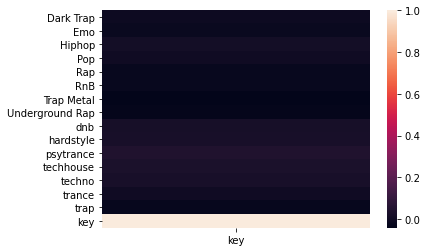

In [33]:
sns.heatmap(corr)

## loudness: float
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

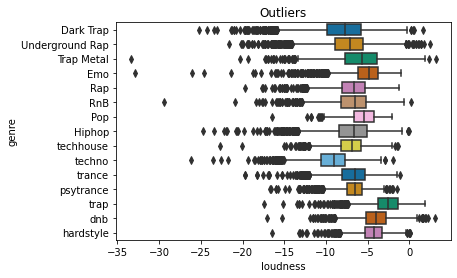

In [34]:
desc, data, boxplot, corr, outliers = analyze_feature(df, "loudness")

In [35]:
print("There are ", len(outliers), " outliers in this feature.")

There are  796  outliers in this feature.


In [36]:
print(desc)

count    42305.000000
mean        -6.465442
std          2.941165
min        -33.357000
25%         -8.161000
50%         -6.234000
75%         -4.513000
max          3.148000
Name: loudness, dtype: float64


## mode: integer
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

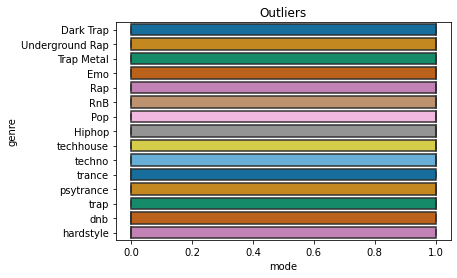

In [37]:
desc, data, boxplot, corr, outliers = analyze_feature(data_frame, "mode")

In [38]:
print("There are ", len(outliers), " outliers in this feature.")

There are  0  outliers in this feature.


In [39]:
print(data)

0    1
1    1
2    1
3    1
4    1
Name: mode, dtype: int64


In [40]:
print(desc)

count    42305.000000
mean         0.549462
std          0.497553
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: mode, dtype: float64


#### Correlation to target

In [41]:
corr

,mode
Dark Trap,-0.009090
Emo,0.055689
Hiphop,-0.012122
Pop,-0.000138
Rap,-0.011717
RnB,-0.007946
Trap Metal,0.074489
Underground Rap,0.051781
dnb,-0.057068
hardstyle,-0.103608


<AxesSubplot:>

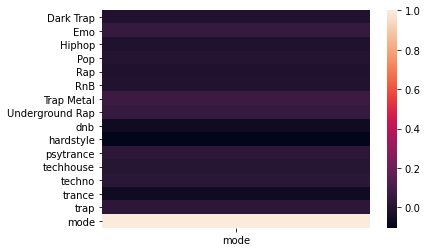

In [42]:
sns.heatmap(corr)

## speechiness: float
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

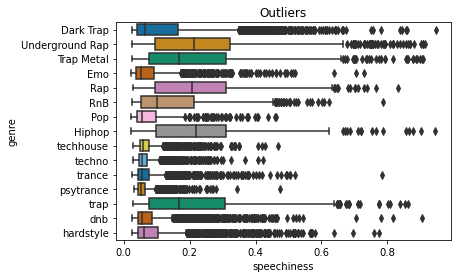

In [43]:
desc, data, boxplot, corr, outliers = analyze_feature(df, "speechiness")

In [44]:
print("There are ", len(outliers), " outliers in this feature.")

There are  1918  outliers in this feature.


In [45]:
print(data)

0    0.4200
1    0.0794
2    0.0623
3    0.1030
4    0.2930
Name: speechiness, dtype: float64


#### Correlation to target

In [46]:
corr

,speechiness
Dark Trap,-0.036242
Emo,-0.090641
Hiphop,0.177355
Pop,-0.040098
Rap,0.137724
RnB,0.011861
Trap Metal,0.127596
Underground Rap,0.281473
dnb,-0.115528
hardstyle,-0.090771


<AxesSubplot:>

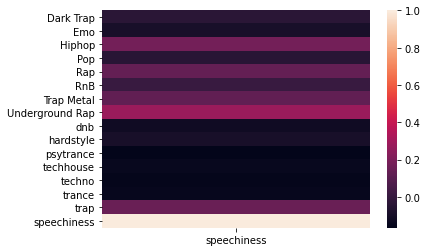

In [47]:
sns.heatmap(corr)

## acousticness: float
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

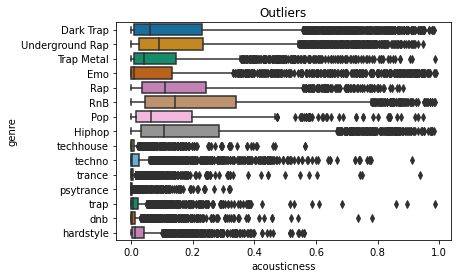

In [48]:
desc, data, boxplot, corr, outliers = analyze_feature(df, "acousticness")

In [49]:
print("There are ", len(outliers), " outliers in this feature.")

There are  5149  outliers in this feature.


In [50]:
print(data)

0    0.0598
1    0.4010
2    0.0138
3    0.0237
4    0.2170
Name: acousticness, dtype: float64


In [51]:
print(desc)

count    42305.000000
mean         0.096160
std          0.170827
min          0.000001
25%          0.001730
50%          0.016400
75%          0.107000
max          0.988000
Name: acousticness, dtype: float64


#### Correlation to target

In [52]:
corr

,acousticness
Dark Trap,0.129148
Emo,0.055871
Hiphop,0.161577
Pop,0.032621
Rap,0.093091
RnB,0.172698
Trap Metal,0.024186
Underground Rap,0.156442
dnb,-0.123154
hardstyle,-0.088435


<AxesSubplot:>

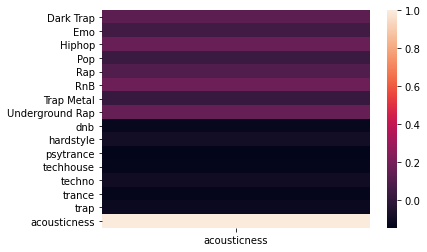

In [53]:
sns.heatmap(corr)

## instrumentalness: float
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

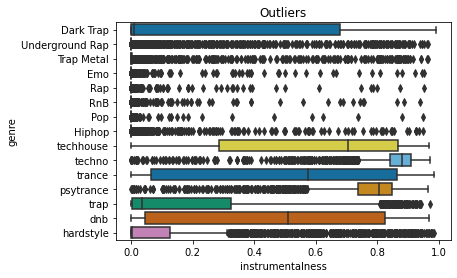

In [54]:
desc, data, boxplot, corr, outliers = analyze_feature(df, "instrumentalness")

In [55]:
print("There are ", len(outliers), " outliers in this feature.")

There are  0  outliers in this feature.


In [56]:
print(data)

0    0.013400
1    0.000000
2    0.000004
3    0.000000
4    0.000000
Name: instrumentalness, dtype: float64


In [57]:
print(desc)

count    42305.000000
mean         0.283048
std          0.370791
min          0.000000
25%          0.000000
50%          0.005940
75%          0.722000
max          0.989000
Name: instrumentalness, dtype: float64


#### Correlation to target

In [58]:
corr

,instrumentalness
Dark Trap,-0.005422
Emo,-0.148983
Hiphop,-0.199110
Pop,-0.076210
Rap,-0.159151
RnB,-0.169860
Trap Metal,-0.134198
Underground Rap,-0.279177
dnb,0.131039
hardstyle,-0.107248


<AxesSubplot:>

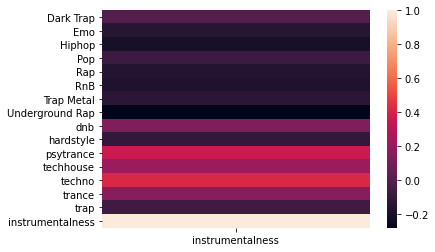

In [59]:
sns.heatmap(corr)

## liveness: float
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

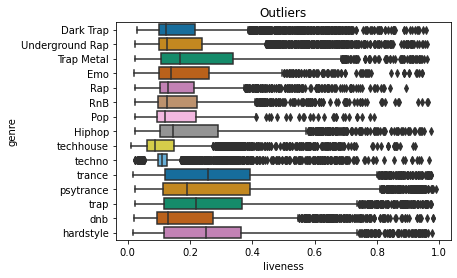

In [60]:
desc, data, boxplot, corr, outliers = analyze_feature(df, "liveness")

In [61]:
print("There are ", len(outliers), " outliers in this feature.")

There are  2496  outliers in this feature.


In [62]:
print(data)

0    0.0556
1    0.1180
2    0.3720
3    0.1140
4    0.1660
Name: liveness, dtype: float64


In [63]:
print(desc)

count    42305.000000
mean         0.214079
std          0.175576
min          0.010700
25%          0.099600
50%          0.135000
75%          0.294000
max          0.988000
Name: liveness, dtype: float64


#### Correlation to target

In [64]:
corr

,liveness
Dark Trap,-0.057533
Emo,-0.021816
Hiphop,-0.005533
Pop,-0.021599
Rap,-0.039877
RnB,-0.045672
Trap Metal,0.037089
Underground Rap,-0.052522
dnb,-0.017510
hardstyle,0.092937


<AxesSubplot:>

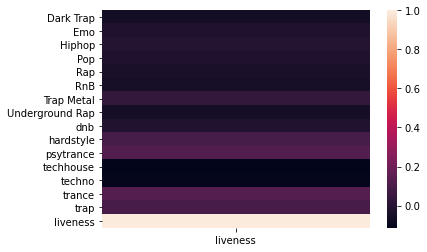

In [65]:
sns.heatmap(corr)

## valence: float
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

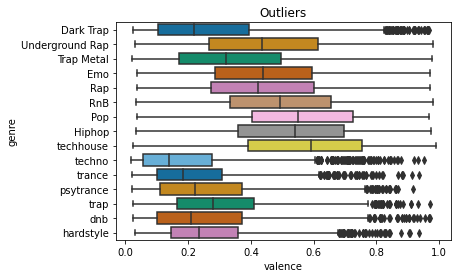

In [66]:
desc, data, boxplot, corr, outliers = analyze_feature(df, "valence")

In [67]:
print("There are ", len(outliers), " outliers in this feature.")

There are  0  outliers in this feature.


In [68]:
print(data)

0    0.3890
1    0.1240
2    0.0391
3    0.1750
4    0.5910
Name: valence, dtype: float64


In [69]:
print(desc)

count    42305.000000
mean         0.357101
std          0.233200
min          0.018700
25%          0.161000
50%          0.322000
75%          0.522000
max          0.988000
Name: valence, dtype: float64


In [70]:
corr

,valence
Dark Trap,-0.124638
Emo,0.075906
Hiphop,0.198276
Pop,0.086943
Rap,0.076821
RnB,0.134108
Trap Metal,-0.007850
Underground Rap,0.150730
dnb,-0.122502
hardstyle,-0.105312


#### Correlation to target

<AxesSubplot:>

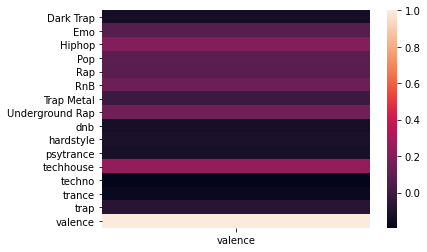

In [71]:
sns.heatmap(corr)

## tempo: float
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

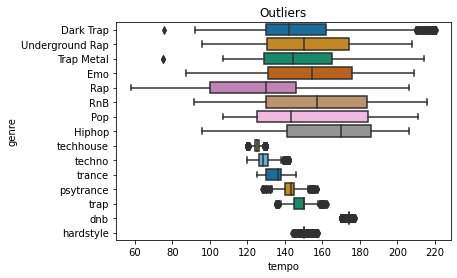

In [72]:
desc, data, boxplot, corr, outliers = analyze_feature(df, "tempo")

In [73]:
print("There are ", len(outliers), " outliers in this feature.")

There are  532  outliers in this feature.


In [74]:
print(data)

0    156.985
1    115.080
2    218.050
3    186.948
4    147.988
Name: tempo, dtype: float64


In [75]:
print(desc)

count    42305.000000
mean       147.474056
std         23.844623
min         57.967000
25%        129.931000
50%        144.973000
75%        161.464000
max        220.290000
Name: tempo, dtype: float64


#### Correlation to target

In [76]:
corr

,tempo
Dark Trap,0.033851
Emo,0.054707
Hiphop,0.180566
Pop,0.020359
Rap,-0.192422
RnB,0.096397
Trap Metal,0.011181
Underground Rap,0.091627
dnb,0.303727
hardstyle,0.036481


<AxesSubplot:>

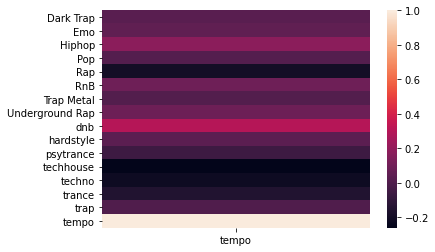

In [77]:
sns.heatmap(corr)

## duration_ms: integer
The duration of the track in milliseconds.

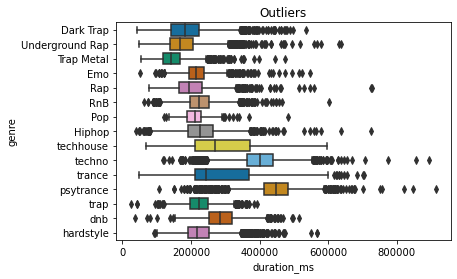

In [78]:
desc, data, boxplot, corr, outliers = analyze_feature(df, "duration_ms")

In [79]:
print("There are ", len(outliers), " outliers in this feature.")

There are  1220  outliers in this feature.


In [80]:
print(data)

0    124539
1    224427
2     98821
3    123661
4    123298
Name: duration_ms, dtype: int64


In [81]:
print(desc)

count     42305.000000
mean     250865.846685
std      102957.713571
min       25600.000000
25%      179840.000000
50%      224760.000000
75%      301133.000000
max      913052.000000
Name: duration_ms, dtype: float64


#### Correlation to target

In [82]:
corr

,duration_ms
Dark Trap,-0.213693
Emo,-0.064289
Hiphop,-0.061789
Pop,-0.040242
Rap,-0.099347
RnB,-0.054290
Trap Metal,-0.221702
Underground Rap,-0.291419
dnb,0.095166
hardstyle,-0.056689


<AxesSubplot:>

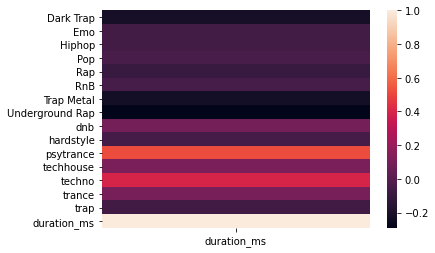

In [83]:
sns.heatmap(corr)

## Correlation between features of X feature matrix

In [84]:
corr = X.corr()
corr

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
danceability,1.000000,-0.323248,-0.012708,-0.216776,0.084413,0.182177,0.069910,-0.067114,-0.196702,0.369845,-0.165929,-0.049807
energy,-0.323248,1.000000,0.044731,0.601540,-0.032203,-0.148363,-0.497334,0.303875,0.231754,-0.013520,-0.024504,0.294464
key,-0.012708,0.044731,1.000000,-0.006810,-0.248283,-0.030634,-0.004937,0.068266,0.002753,0.028600,-0.009862,0.069255
loudness,-0.216776,0.601540,-0.006810,1.000000,-0.004744,0.048035,-0.283876,-0.187933,0.167104,0.080916,0.151610,-0.095999
mode,0.084413,-0.032203,-0.248283,-0.004744,1.000000,0.050260,-0.014514,-0.016402,0.007280,0.022208,-0.012191,-0.031253
speechiness,0.182177,-0.148363,-0.030634,0.048035,0.050260,1.000000,0.160184,-0.386571,0.057432,0.218829,0.164674,-0.309892
acousticness,0.069910,-0.497334,-0.004937,-0.283876,-0.014514,0.160184,1.000000,-0.261896,-0.107229,0.099328,0.055643,-0.246681
instrumentalness,-0.067114,0.303875,0.068266,-0.187933,-0.016402,-0.386571,-0.261896,1.000000,-0.015990,-0.257068,-0.207667,0.603784
liveness,-0.196702,0.231754,0.002753,0.167104,0.007280,0.057432,-0.107229,-0.015990,1.000000,-0.025156,0.028327,0.010594
valence,0.369845,-0.013520,0.028600,0.080916,0.022208,0.218829,0.099328,-0.257068,-0.025156,1.000000,0.058374,-0.191093


<AxesSubplot:>

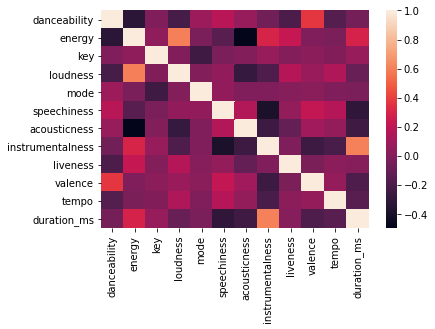

In [85]:
sns.heatmap(corr)

# Feature Engineering/Selection

In [86]:
def remove_outliers(df):
    print("Removing outliers...\n")
    genre = df['genre']
    X = df.drop(columns = ["genre"])
    z=np.abs(stats.zscore(X))
    df = pd.DataFrame(df[(z < 2).all(axis=1)])
    df['genre'] = genre
    print("Outliers removed.")
    return df

In [87]:
def replace_outliers(df):
    features = ["danceability","energy", "key", 
           "loudness" , "speechiness", "acousticness", 
           "instrumentalness", "liveness", "valence", 
           "tempo", "duration_ms", "mode"]
    
    print("Replacing outliers with the median of each feature...\n")
    df = df.mask(df.sub(df.mean()).div(df.std()).abs().gt(2))
    for feature in features:
        print(feature)
        df[str(feature)] = df[str(feature)].fillna(value = df[(str(feature))].mean())
    print("Outliers replaced.")
    return df

# Data Processing Pipeline

In [88]:
def encode_target(df):
    print("Encoding target data...\n")
    label_encoder = LabelEncoder()
    df["genre_enc"] = LabelEncoder().fit_transform(df['genre'])
    df = df.drop(columns = ['genre'])
    df = df.rename({'genre_enc': 'genre'}, axis='columns')
    print("Target data encoded with LabelEncoder.\n")
    return df

In [89]:
def univariate_selection(X, y):
    print("Choosing which features to select using univariate_selection...\n ")
    test = SelectKBest(score_func=f_classif, k=9)
    fit = test.fit(X, y.values.ravel())
    X = fit.transform(X)
    print("Feature selection done.\n")
    return X  

In [90]:
def principal_component_analysis(X, y):
    print("Choosing which features to select...\n")
    pca = PCA(n_components=3)
    fit = pca.fit(X)
    X = fit.transform(X)
    print("Feature selection done.")
    return X

In [91]:
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.222, random_state=42)
    return X_train, X_test, y_train, y_test

In [92]:
def normalize(X):
    X = pd.DataFrame(X)
    return X.apply(lambda x: x/x.max(), axis=0)

In [93]:
def pipe_line(feature_selection_method, outlier_dec):
    print("Sending data through a pipeline using ", feature_selection_method, "...")
    # load the data
    df = load_csv()
    
    # drop known irrelevent features
    df = drop_features_from_list(features_list)
    
    # eencode categorical target data
    df = encode_target(df)
    
    # remove all outliers present in the data 
    if outlier_dec == "remove":
        df = remove_outliers(df)
    
    # replace outliers with mean of column feature
    if outlier_dec == "replace":
        df = replace_outliers(df)
    
    if outlier_dec == "do nothing":
        print("Continuing with outliers in dataframe...")
    
    # Get feature and target matrix
    X, y = get_X_and_y(df)
    
    # select method for feature selection 
    if feature_selection_method == "uni":
        X = univariate_selection(X, y)
        
    if feature_selection_method == "pca":
        X = principal_component_analysis(X, y)
        
    if feature_selection_method == "none":
        print("Keeping all features")
    
    X = normalize(X)
    
    # split the data
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    return X_train, X_test, y_train, y_test

In [94]:
def choose_feature_selection_method(fs, outlier_dec):
    
    if fs == "uni":
        print("Univariate Selection ...")
        X_train, X_test, y_train, y_test = pipe_line(fs, outlier_dec)
        
    elif fs == "pca":
        print("Principal Component Analysis... ")
        X_train, X_test, y_train, y_test = pipe_line(fs, outlier_dec)
        
    else:
        print("None")
        X_train, X_test, y_train, y_test = pipe_line(fs, outlier_dec)

    return X_train, X_test, y_train, y_test

# Classification Section/ Build Models

In [95]:
def multi_log_regr(X_train, y_train, X_test, y_test):
    
    print("Traininig multinomial linear regression model...")
    # Train logistic regression model
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    model.fit(X_train, y_train.values.ravel())
    print("Model training phase complete.")
    
    # predict X 
    y_hat = model.predict(X_test)
    
    # define the model evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=42)
    
    # evaluate the model and collect the scores
    n_scores = cross_val_score(model, X_test, y_test.values.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)
    
    # report the model performance
    print("Evaluating the performance of model...")
    report = classification_report(y_test.values.ravel(), y_hat)
    print("Evaluation complete.")
    return report, n_scores

In [96]:
def random_forest_classifier(X_train, y_train, X_test, y_test):
    
    # Train the model
    print("Training random forest classifier...")
    model = RandomForestClassifier()
    model.fit(X_train, y_train.values.ravel())
    print("Model training phase complete.")
    
    # predict X 
    y_hat = model.predict(X_test)
    
    # define the model evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=42)
    
    # evaluate the model and collect the scores
    n_scores = cross_val_score(model, X_test, y_test.values.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)
    
    # report the model performance
    print("Evaluating the performance of model...")
    report = classification_report(y_test.values.ravel(), y_hat)
    print("Evaluation complete.")
    return report, n_scores

In [97]:
def multi_layer_perceptron_classifier(X_train, y_train, X_test, y_test):
    print("Training multi-layer perceptron classifier...")
    model = MLPClassifier(hidden_layer_sizes=1, activation="logistic", random_state = 42).fit(X_train, y_train)
    model.fit(X_train, y_train.values.ravel())
    print("Model training phase complete.")
    
    # predict X 
    y_hat = model.predict(X_test)
    
    # define the model evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=42)
    
    # evaluate the model and collect the scores
    n_scores = cross_val_score(model, X_test, y_test.values.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)
    
    # report the model performance
    print("Evaluating the performance of model...")
    report = classification_report(y_test.values.ravel(), y_hat)
    print("Evaluation complete.")
    return report, n_scores

In [98]:
def naive_bayes(X_train, y_train, X_test, y_test):
    # Train the model
    print("Training random forest classifier...")
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    scaler.fit(X_test)
    X_test = scaler.transform(X_test)
    
    model = MultinomialNB()
    model.fit(X_train, y_train.values.ravel())
    print("Model training phase complete.")
    
    # predict X 
    y_hat = model.predict(X_test)
    
    # define the model evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=42)
    
    # evaluate the model and collect the scores
    n_scores = cross_val_score(model, X_test, y_test.values.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)
    
    # report the model performance
    print("Evaluating the performance of model...")
    report = classification_report(y_test.values.ravel(), y_hat)
    print("Evaluation complete.")
    return report, n_scores

In [99]:
def k_nearest(X_train, y_train, X_test, y_test):
    # Train the model
    print("Training model...")
    model = KNeighborsClassifier()
    model.fit(X_train, y_train.values.ravel())
    print("Model training phase complete.")
    
    # predict X 
    y_hat = model.predict(X_test)
    
    # define the model evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=42)
    
    # evaluate the model and collect the scores
    n_scores = cross_val_score(model, X_test, y_test.values.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)
    
    # report the model performance
    print("Evaluating the performance of model...")
    report = classification_report(y_test.values.ravel(), y_hat)
    print("Evaluation complete.")
    return report, n_scores

# Model Accuracy and Results

In [100]:
def show_results(feature_selection_method, model_type, outlier_dec):
    X_train, X_test, y_train, y_test = choose_feature_selection_method(feature_selection_method, outlier_dec)
    
    if model_type == "rf":
        report, n_scores = random_forest_classifier(X_train, y_train, X_test, y_test)
        
    elif model_type == "lr":
        report, n_scores = multi_log_regr(X_train, y_train, X_test, y_test)
        
    elif model_type == "nb":
        report, n_scores = naive_bayes(X_train, y_train, X_test, y_test)
        
    elif model_type == "knn":
        report, n_scores = k_nearest(X_train, y_train, X_test, y_test)
    
    elif model_type == "mlp":
        report, n_scores =  multi_layer_perceptron_classifier(X_train, y_train, X_test, y_test)
        
    else:
        print("Error with model name.")
        
    return report, n_scores

 ### Below is a key for the parameters of 'show_results(feature_selection, model_type, outlier course of action)'
 #### Feature Selection:
 
     1) 'uni' ---> Univariate Selection
     2) 'pca' ---> Principle Component Analysis 
     3) 'none'---> Keep all the features
 
 #### Model Type
     1) 'rf' ---> random forest
     2) 'lr' ---> multinomial logistic regression
     3) 'knn'---> K nearest neighbor
     4) 'nb' ---> Naive Bayes
     5) 'mlp' --> multilayer perceptron 
     
 #### Outlier course of Action
     1) 'remove' ---> remove outliers
     2) 'replace' ---> replace outliers 
     3) 'do nothing'---> keep all the outliers as is
     
Feel free to play around with the parameters passed in show_results below. Here are some of the most successful models. 

## Random Forest Classifier

In [102]:
report, n_scores = show_results("uni", "rf", "do nothing")

Univariate Selection ...
Sending data through a pipeline using  uni ...
data/genres_v2.csv successfully loaded into pandas dataframe 'genres_df'
Making a copy of 'data_frame' called 'df'...
Dropping features...
Keeping:  

 ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'mode', 'genre'] 
 

Done.
Encoding target data...

Target data encoded with LabelEncoder.

Continuing with outliers in dataframe...
Seperating target variable 'genre' from dataset X...
Choosing which features to select using univariate_selection...
 
Feature selection done.

Training random forest classifier...
Model training phase complete.
Evaluating the performance of model...
Evaluation complete.


In [103]:
print(report)

              precision    recall  f1-score   support

           0       0.53      0.46      0.49      1077
           1       0.72      0.71      0.72       380
           2       0.42      0.41      0.41       685
           3       0.25      0.10      0.14       109
           4       0.48      0.32      0.39       383
           5       0.41      0.37      0.39       446
           6       0.36      0.28      0.32       427
           7       0.38      0.50      0.44      1324
           8       0.96      0.99      0.97       673
           9       0.89      0.93      0.91       667
          10       0.93      0.93      0.93       652
          11       0.87      0.91      0.89       633
          12       0.86      0.86      0.86       658
          13       0.84      0.87      0.86       634
          14       0.87      0.86      0.86       644

    accuracy                           0.67      9392
   macro avg       0.65      0.63      0.64      9392
weighted avg       0.67   

## Logistic Regression

In [104]:
report, n_scores = show_results("none", "lr", "do nothing")

None
Sending data through a pipeline using  none ...
data/genres_v2.csv successfully loaded into pandas dataframe 'genres_df'
Making a copy of 'data_frame' called 'df'...
Dropping features...
Keeping:  

 ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'mode', 'genre'] 
 

Done.
Encoding target data...

Target data encoded with LabelEncoder.

Continuing with outliers in dataframe...
Seperating target variable 'genre' from dataset X...
Keeping all features
Traininig multinomial linear regression model...


/Users/lucasnieddu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model training phase complete.
Evaluating the performance of model...
Evaluation complete.


In [105]:
print(report)

              precision    recall  f1-score   support

           0       0.50      0.40      0.44      1077
           1       0.42      0.50      0.46       380
           2       0.45      0.37      0.41       685
           3       0.50      0.01      0.02       109
           4       0.46      0.31      0.37       383
           5       0.38      0.28      0.32       446
           6       0.44      0.16      0.23       427
           7       0.44      0.66      0.53      1324
           8       0.77      0.80      0.78       673
           9       0.55      0.62      0.58       667
          10       0.76      0.81      0.79       652
          11       0.73      0.78      0.75       633
          12       0.75      0.78      0.76       658
          13       0.63      0.61      0.62       634
          14       0.65      0.69      0.67       644

    accuracy                           0.57      9392
   macro avg       0.56      0.52      0.52      9392
weighted avg       0.57   

## Naive Bayes

In [108]:
report, n_scores = show_results("none", "nb", "replace")

None
Sending data through a pipeline using  none ...
data/genres_v2.csv successfully loaded into pandas dataframe 'genres_df'
Making a copy of 'data_frame' called 'df'...
Dropping features...
Keeping:  

 ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'mode', 'genre'] 
 

Done.
Encoding target data...

Target data encoded with LabelEncoder.

Replacing outliers with the median of each feature...

danceability
energy
key
loudness
speechiness
acousticness
instrumentalness
liveness
valence
tempo
duration_ms
mode
Outliers replaced.
Seperating target variable 'genre' from dataset X...
Keeping all features
Training random forest classifier...
Model training phase complete.
Evaluating the performance of model...
Evaluation complete.


/Users/lucasnieddu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasnieddu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasnieddu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
print(report)

              precision    recall  f1-score   support

           0       0.28      0.23      0.25      1077
           1       0.00      0.00      0.00       380
           2       0.00      0.00      0.00       685
           3       0.00      0.00      0.00       109
           4       0.00      0.00      0.00       383
           5       0.00      0.00      0.00       446
           6       0.00      0.00      0.00       427
           7       0.24      0.96      0.38      1324
           8       0.83      0.35      0.50       673
           9       0.38      0.23      0.29       667
          10       0.49      0.54      0.51       652
          11       0.69      0.53      0.60       633
          12       0.66      0.65      0.65       658
          13       0.42      0.30      0.35       634
          14       0.56      0.15      0.24       644

    accuracy                           0.35      9392
   macro avg       0.30      0.26      0.25      9392
weighted avg       0.35   

## K nearest Neighbor

In [110]:
report, n_scores = show_results("uni", "knn", "replace")

Univariate Selection ...
Sending data through a pipeline using  uni ...
data/genres_v2.csv successfully loaded into pandas dataframe 'genres_df'
Making a copy of 'data_frame' called 'df'...
Dropping features...
Keeping:  

 ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'mode', 'genre'] 
 

Done.
Encoding target data...

Target data encoded with LabelEncoder.

Replacing outliers with the median of each feature...

danceability
energy
key
loudness
speechiness
acousticness
instrumentalness
liveness
valence
tempo
duration_ms
mode
Outliers replaced.
Seperating target variable 'genre' from dataset X...
Choosing which features to select using univariate_selection...
 
Feature selection done.

Training model...
Model training phase complete.
Evaluating the performance of model...
Evaluation complete.


In [111]:
print(report)

              precision    recall  f1-score   support

           0       0.32      0.36      0.34      1077
           1       0.42      0.46      0.44       380
           2       0.31      0.32      0.32       685
           3       0.08      0.04      0.05       109
           4       0.12      0.13      0.13       383
           5       0.26      0.20      0.23       446
           6       0.25      0.14      0.18       427
           7       0.36      0.36      0.36      1324
           8       0.79      0.72      0.75       673
           9       0.51      0.63      0.56       667
          10       0.60      0.73      0.66       652
          11       0.66      0.70      0.68       633
          12       0.69      0.69      0.69       658
          13       0.59      0.48      0.53       634
          14       0.60      0.61      0.60       644

    accuracy                           0.47      9392
   macro avg       0.44      0.44      0.43      9392
weighted avg       0.46   

## Multilayer Perceptron Classifier

In [112]:
report, n_scores = show_results("none", "mlp", "remove")

None
Sending data through a pipeline using  none ...
data/genres_v2.csv successfully loaded into pandas dataframe 'genres_df'
Making a copy of 'data_frame' called 'df'...
Dropping features...
Keeping:  

 ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'mode', 'genre'] 
 

Done.
Encoding target data...

Target data encoded with LabelEncoder.

Removing outliers...

Outliers removed.
Seperating target variable 'genre' from dataset X...
Keeping all features
Training multi-layer perceptron classifier...


/Users/lucasnieddu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lucasnieddu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasnieddu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model training phase complete.
Evaluating the performance of model...
Evaluation complete.


/Users/lucasnieddu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasnieddu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasnieddu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
print(report)

              precision    recall  f1-score   support

           0       0.11      0.21      0.14       620
           1       0.00      0.00      0.00       265
           2       0.00      0.00      0.00       389
           3       0.00      0.00      0.00        67
           4       0.00      0.00      0.00       219
           5       0.00      0.00      0.00       273
           6       0.00      0.00      0.00       248
           7       0.33      0.92      0.48       789
           8       0.22      0.39      0.28       552
           9       0.20      0.15      0.17       516
          10       0.00      0.00      0.00       292
          11       0.00      0.00      0.00       502
          12       0.33      0.82      0.47       468
          13       0.17      0.05      0.07       493
          14       0.00      0.00      0.00       464

    accuracy                           0.25      6157
   macro avg       0.09      0.17      0.11      6157
weighted avg       0.13   

# Summary/ Final Thoughts:
- I would like to play around some more with the parameters and maybe do a grid search to find the best combination of paremeters for better accuracy
- The random forest classifier was the winner at 67 percent accuracy. 
- Mulit layer perceptron did not do very good at all. I almost left it out completely. 
- There is a lot more that can be done do better the accuracy
- This was a fun project to get familiar with different machine learning techniques. 
- Outliers, I believe, is the biggest problem for the model accuracy in this particular problem.
- Verdict? ---> Super successfull and fun. 
   